
# Comprehensive Analysis of "Voices of History: 50 Iconic Speeches" Dataset

This notebook performs advanced analysis on the "Voices of History: 50 Iconic Speeches" dataset. The dataset comprises a collection of some of the most influential and memorable speeches in history. This analysis will include sentiment analysis, topic modeling, and emotion detection to uncover the underlying patterns and themes in these iconic speeches.


## Importing necessary Libraries 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Dataset Loading

In [2]:

file_path = 'data/50 Famous Speechs.csv'
speeches_df = pd.read_csv(file_path, encoding='ISO-8859-1')

speeches_df.head()


,Title of the Speech,Speech
0,1. I have a dream by MLK,"I have a dream that one day down in Alabama, ..."
1,2. Tilbury Speech by Queen Elizabeth I,"My loving people,\n\nWe have been persuaded b..."
2,"3. Woodrow Wilson, address to Congress (April ...",The world must be made safe for democracy. It...
3,4. Ainât I A Woman by Sojourner Truth,That man over there says that women need to b...
4,5. The Gettsyburg Address by Abraham Lincoln,"Fondly do we hope, fervently do we pray, that..."


## Data Preprocessing

In [3]:

speeches_df['Title of the Speech'] = speeches_df['Title of the Speech'].str.strip()
speeches_df['Speech'] = speeches_df['Speech'].str.strip()

speeches_df.head()


,Title of the Speech,Speech
0,1. I have a dream by MLK,"I have a dream that one day down in Alabama, ..."
1,2. Tilbury Speech by Queen Elizabeth I,"My loving people,\n\nWe have been persuaded b..."
2,"3. Woodrow Wilson, address to Congress (April ...",The world must be made safe for democracy. It...
3,4. Ainât I A Woman by Sojourner Truth,That man over there says that women need to b...
4,5. The Gettsyburg Address by Abraham Lincoln,"Fondly do we hope, fervently do we pray, that..."


## Sentiment Analysis

In [4]:

sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return sid.polarity_scores(text)

speeches_df['Sentiment'] = speeches_df['Speech'].apply(get_sentiment_scores)

speeches_df = pd.concat([speeches_df.drop(['Sentiment'], axis=1), speeches_df['Sentiment'].apply(pd.Series)], axis=1)

speeches_df.head()


,Title of the Speech,Speech,neg,neu,pos,compound
0,1. I have a dream by MLK,"I have a dream that one day down in Alabama, ...",0.055,0.750,0.195,0.9901
1,2. Tilbury Speech by Queen Elizabeth I,"My loving people,\n\nWe have been persuaded b...",0.098,0.708,0.194,0.9865
2,"3. Woodrow Wilson, address to Congress (April ...",The world must be made safe for democracy. It...,0.102,0.669,0.228,0.9988
3,4. Ainât I A Woman by Sojourner Truth,That man over there says that women need to b...,0.058,0.826,0.116,0.9140
4,5. The Gettsyburg Address by Abraham Lincoln,"Fondly do we hope, fervently do we pray, that...",0.060,0.804,0.136,0.9147


## Sentiment Scores Visualization

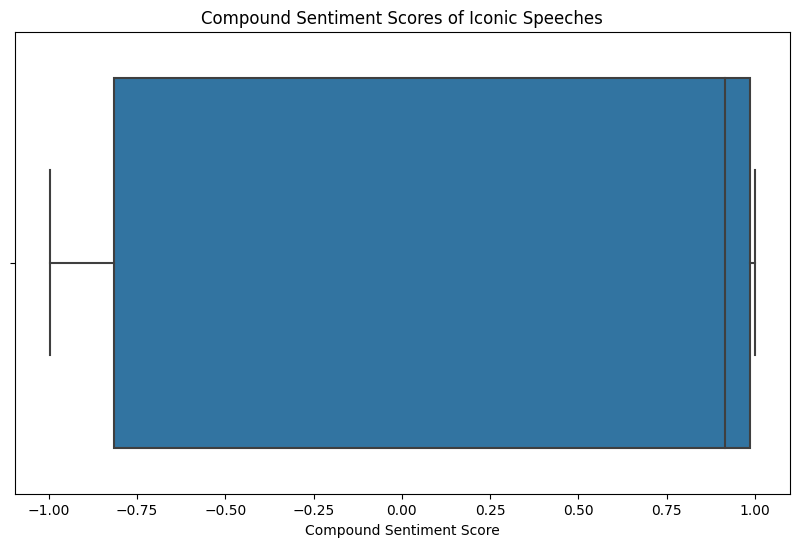

In [5]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='compound', data=speeches_df)
plt.title('Compound Sentiment Scores of Iconic Speeches')
plt.xlabel('Compound Sentiment Score')
plt.show()


## Topic Modeling using Latent Dirichlet Allocation (LDA)

In [6]:

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(speeches_df['Speech'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = get_top_words(lda, tfidf_feature_names, 10)

for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")


Topic 1: war, hope, people, freedom, love, women, position, won, future, infinite
Topic 2: like, rise, shall, day, right, liberty, nation, states, years, let
Topic 3: shall, come, let, world, ask, bullet, gay, hope, people, die
Topic 4: woman, human, freedom, men, struggle, people, know, man, let, going
Topic 5: party, women, army, live, white, country, black, world, ll, history


## Emotion Detection using TextBlob

In [7]:

def get_emotion(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

speeches_df['Polarity'], speeches_df['Subjectivity'] = zip(*speeches_df['Speech'].apply(get_emotion))

speeches_df.head()


,Title of the Speech,Speech,neg,neu,pos,compound,Polarity,Subjectivity
0,1. I have a dream by MLK,"I have a dream that one day down in Alabama, ...",0.055,0.750,0.195,0.9901,0.097756,0.451118
1,2. Tilbury Speech by Queen Elizabeth I,"My loving people,\n\nWe have been persuaded b...",0.098,0.708,0.194,0.9865,0.119983,0.677266
2,"3. Woodrow Wilson, address to Congress (April ...",The world must be made safe for democracy. It...,0.102,0.669,0.228,0.9988,0.173672,0.584223
3,4. Ainât I A Woman by Sojourner Truth,That man over there says that women need to b...,0.058,0.826,0.116,0.9140,0.273923,0.372591
4,5. The Gettsyburg Address by Abraham Lincoln,"Fondly do we hope, fervently do we pray, that...",0.060,0.804,0.136,0.9147,0.264286,0.524286


## Emotion Visualization

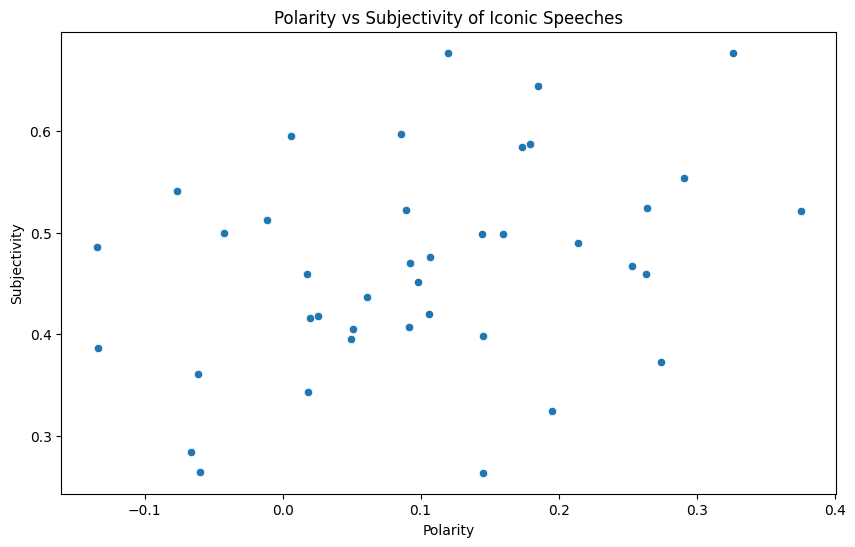

In [8]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Polarity', y='Subjectivity', data=speeches_df)
plt.title('Polarity vs Subjectivity of Iconic Speeches')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


## N-Gram Analysis

In [9]:

from collections import Counter
from nltk.util import ngrams

def get_ngrams(text, n=2):
    tokens = nltk.word_tokenize(text)
    return list(ngrams(tokens, n))

speeches_df['Bigrams'] = speeches_df['Speech'].apply(lambda x: get_ngrams(x, 2))

all_bigrams = [bigram for sublist in speeches_df['Bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)

most_common_bigrams = bigram_counts.most_common(10)
most_common_bigrams


[(('of', 'the'), 85),
 ((',', 'and'), 65),
 (('in', 'the'), 54),
 ((',', 'the'), 44),
 (('.', 'The'), 28),
 (('for', 'the'), 23),
 (('will', 'be'), 22),
 ((',', 'to'), 22),
 (('to', 'be'), 22),
 (('and', 'the'), 21)]

## TF-IDF Visualization

C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabt

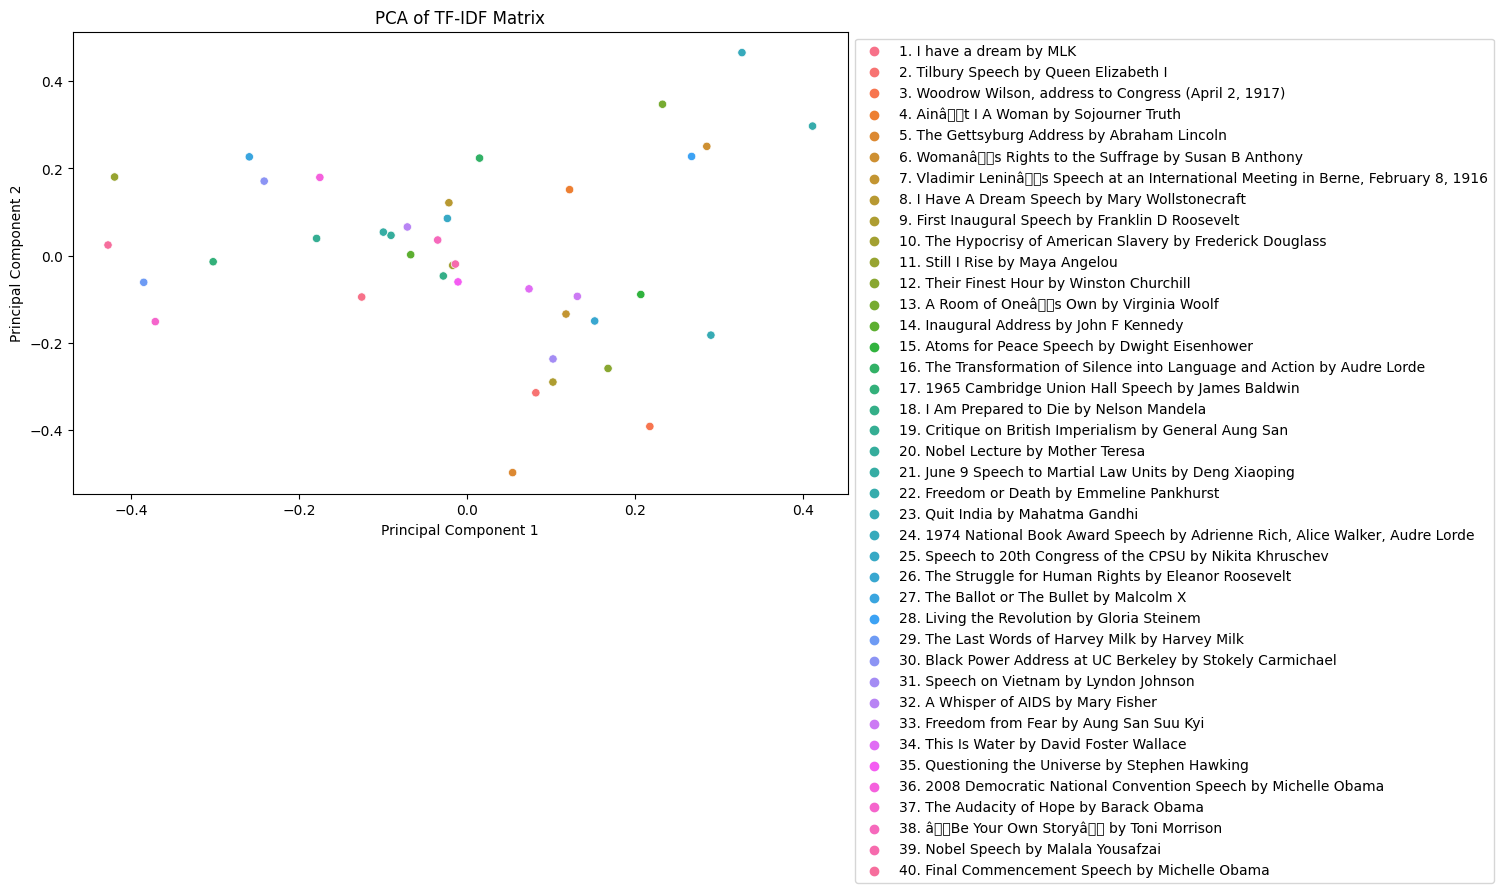

In [10]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf.toarray())

pca_df = pd.DataFrame(tfidf_pca, columns=['PC1', 'PC2'])
pca_df['Speech'] = speeches_df['Title of the Speech']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Speech')
plt.title('PCA of TF-IDF Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()



# Insights

**Sentiment Analysis** - The sentiment analysis of the speeches reveals a wide range of emotional tones, from highly positive and inspiring speeches to those addressing serious and somber topics. The box plot of compound sentiment scores provides a clear visualization of this diversity.

**Topic Modeling** - The topic modeling analysis identified several key themes across the speeches. These include civil rights, social justice, war, democracy, and leadership. The recurring themes highlight the common threads that have driven influential oratory throughout history.

**Emotion Detection** - The polarity and subjectivity analysis using TextBlob demonstrates the varying degrees of emotional intensity and personal opinion expressed in these speeches. The scatter plot provides a visual representation of the emotional landscape of the speeches.

**N-Gram Analysis** - The n-gram analysis uncovers frequently occurring word pairs (bigrams) in the speeches. This can provide insights into common phrases and expressions used by the orators to convey their messages effectively.

**TF-IDF Visualization** - The PCA of the TF-IDF matrix offers a visual exploration of the similarities and differences between the speeches based on their textual content. This visualization helps to identify clusters of speeches with similar themes or styles.



## Conclusion
The "Voices of History: 50 Iconic Speeches" dataset offers a rich resource for understanding the power of oratory in shaping history. Through sentiment analysis, topic modeling, emotion detection, and n-gram analysis, we gain deeper insights into the strategic use of language by some of the most influential speakers. These analyses not only highlight the enduring impact of these speeches but also provide valuable lessons for effective communication and public speaking.
